In [3]:
from pathlib import Path

label_dir = Path("/Users/olivia/Documents/MS-ADS @Uchicago/Capstone /datasets/lvis/labels/val2017")
image_dir = Path("/Users/olivia/Documents/MS-ADS @Uchicago/Capstone /datasets/lvis/images/val2017")

label_files = list(label_dir.glob("*.txt"))
image_files = list(image_dir.glob("*.jpg"))

print(f"Label files: {len(label_files)}")
print(f"Image files: {len(image_files)}")

Label files: 4752
Image files: 5000


In [7]:
import json

# Load LVIS annotation JSON
json_path = "/Users/olivia/Documents/MS-ADS @Uchicago/Capstone /datasets/lvis/annotations/lvis_v1_val.json"

with open(json_path, 'r') as f:
    lvis_data = json.load(f)

# Extract class names from 'categories'
categories = lvis_data['categories']
class_names = [cat['name'] for cat in categories]
class_id_map = {cat['id']: i for i, cat in enumerate(categories)}  # Optional: map original ID to 0-indexed

print(f"Total LVIS classes: {len(class_names)}")
print(class_names[:10])  # show first 10

Total LVIS classes: 1203
['aerosol_can', 'air_conditioner', 'airplane', 'alarm_clock', 'alcohol', 'alligator', 'almond', 'ambulance', 'amplifier', 'anklet']


In [9]:
# Update this part of your loop to get class counts
for label_file in label_files:
    with open(label_file) as f:
        for line in f:
            class_id = int(line.strip().split()[0])
            category_counts[class_id] += 1

##### Top-20 category

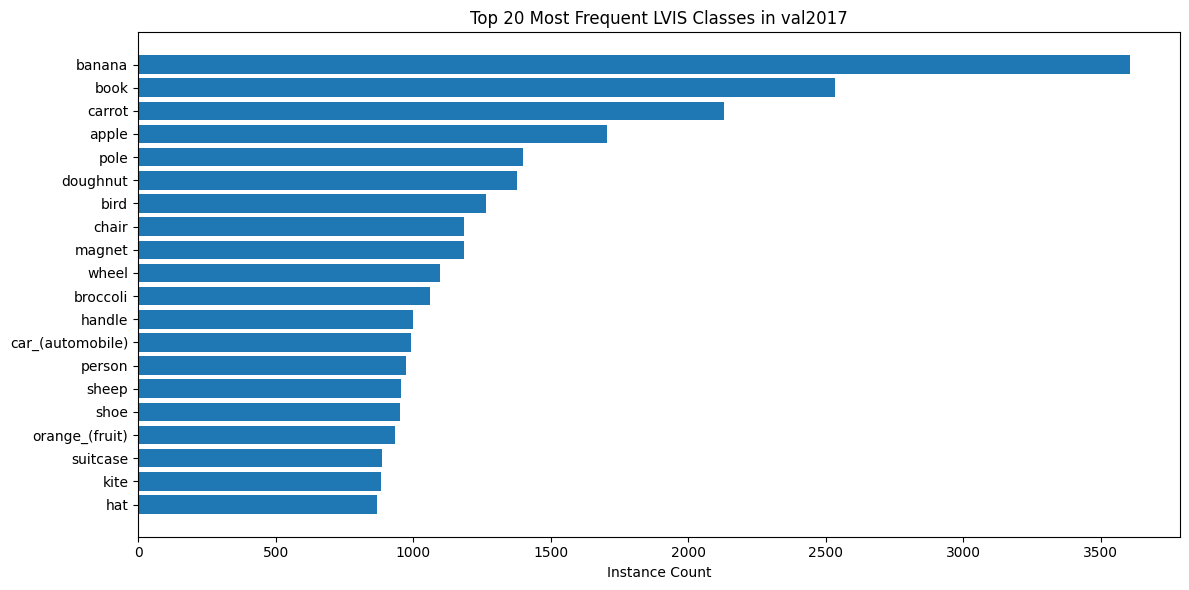

In [10]:
top_n = 20
top_classes = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_labels = [class_names[i] for i, _ in top_classes]
top_counts = [c for _, c in top_classes]

plt.figure(figsize=(12, 6))
plt.barh(top_labels[::-1], top_counts[::-1])
plt.xlabel("Instance Count")
plt.title("Top 20 Most Frequent LVIS Classes in val2017")
plt.tight_layout()
plt.show()

In [13]:
with open("/Users/olivia/Documents/MS-ADS @Uchicago/Capstone /datasets/lvis/lvis.names", "w") as f:
    f.write("\n".join(class_names))

##### Distributions of Number of Annotations

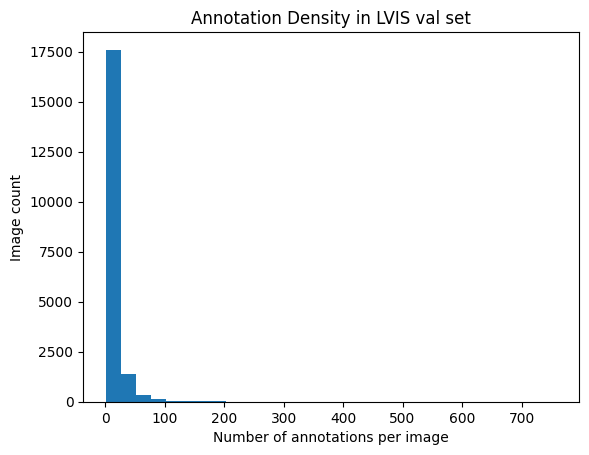

Max annotations in one image: 759
Avg annotations per image: 12.47


In [16]:
import matplotlib.pyplot as plt

image_annotations = {}  # image_id: count

for ann in lvis_data['annotations']:
    image_id = ann['image_id']
    image_annotations[image_id] = image_annotations.get(image_id, 0) + 1

ann_counts = list(image_annotations.values())

plt.hist(ann_counts, bins=30)
plt.xlabel("Number of annotations per image")
plt.ylabel("Image count")
plt.title("Annotation Density in LVIS val set")
plt.show()

print(f"Max annotations in one image: {max(ann_counts)}")
print(f"Avg annotations per image: {sum(ann_counts)/len(ann_counts):.2f}")


##### Long-Tailed Distribution

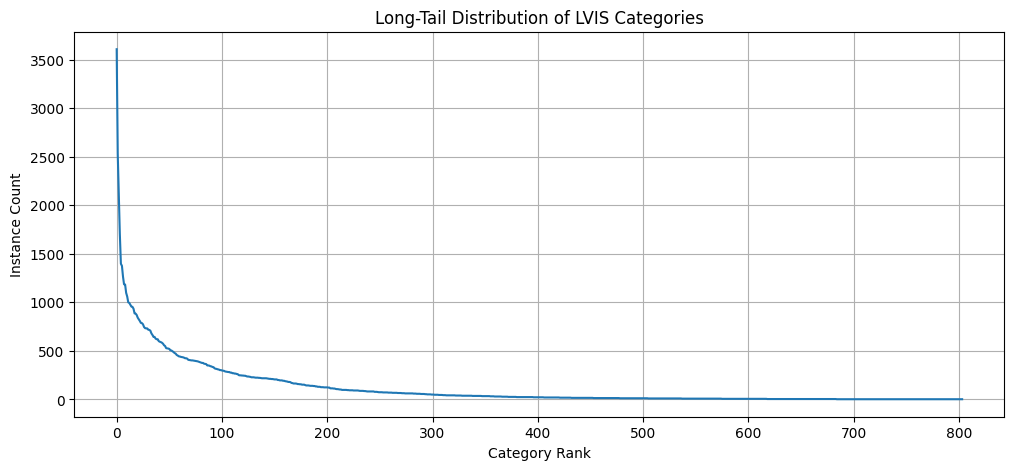

In [21]:
all_counts = sorted(category_counts.values(), reverse=True)

plt.figure(figsize=(12,5))
plt.plot(all_counts)
plt.xlabel("Category Rank")
plt.ylabel("Instance Count")
plt.title("Long-Tail Distribution of LVIS Categories")
plt.grid(True)
plt.show()

##### Bounding Box Size Distribution

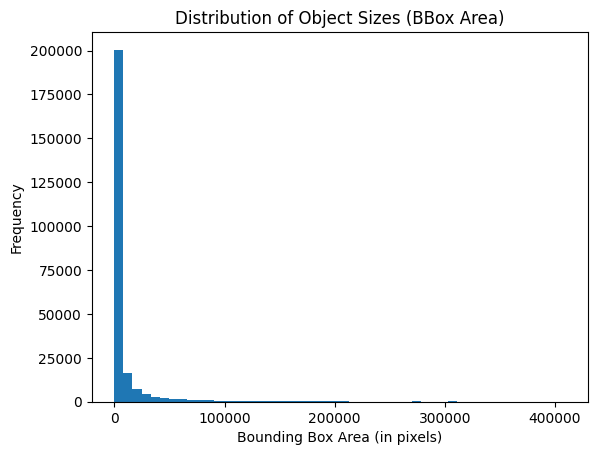

Avg bbox area: 9332.99


In [25]:
bbox_areas = []

for ann in lvis_data['annotations']:
    _, _, width, height = ann['bbox']
    bbox_areas.append(width * height)

plt.hist(bbox_areas, bins=50)
plt.xlabel("Bounding Box Area (in pixels)")
plt.ylabel("Frequency")
plt.title("Distribution of Object Sizes (BBox Area)")
plt.show()

print(f"Avg bbox area: {sum(bbox_areas)/len(bbox_areas):.2f}")

##### Visualize Sample Annotated Image (with BBoxes)

In [ ]:
import random
from PIL import Image
import matplotlib.patches as patches

# Pick a random image with annotations
image_info = random.choice(lvis_data['images'])
image_id = image_info['id']
file_name = image_info['file_name']

# Get annotations for this image
anns = [ann for ann in lvis_data['annotations'] if ann['image_id'] == image_id]

# Load the image
img_path = f"/Users/olivia/Documents/MS-ADS @Uchicago/Capstone /datasets/lvis/images/val2017/{file_name}"
img = Image.open(img_path)

# Plot
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(img)

for ann in anns:
    x, y, w, h = ann['bbox']
    class_id = ann['category_id']
    try:
        class_name = next(c['name'] for c in lvis_data['categories'] if c['id'] == class_id)
    except:
        class_name = str(class_id)
    
    rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y - 2, class_name, color='white', backgroundcolor='red', fontsize=8)

plt.axis('off')
plt.title(f"Image ID: {image_id} with {len(anns)} annotations")
plt.show()